## EmployeeSQL
### Bonus Analysis



In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Import database parameters
from config import db_host, db_name, db_user, db_password

### 1. Set database connection

In [2]:
## Set SQLAlchemy Parameters
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}')
connection = engine.connect()

In [3]:
## Get table names
print(engine.table_names())

['title', 'employee', 'dept_employee', 'department', 'dept_manager', 'salary']


<ipython-input-3-a15e1b6fd915>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


### 2. Import salary data from PostgreSQL database into Pandas

In [4]:
## Build SQL statement
sql_statement = "SELECT * FROM salary"

In [5]:
## Retrieve salary data from "salary" table into DataFrame
salary_df = pd.read_sql(sql_statement, connection)
## Set index
salary_df.set_index('emp_no', drop=True, inplace=True)
## Show DataFrame
salary_df

,salary
emp_no,
10001,60117
10002,65828
10003,40006
10004,40054
10005,78228
...,...
499995,40000
499996,58058
499997,49597


### 3. Visualize  most common salary ranges for employees (histogram)

In [17]:
# salary_df['salary'].plot.hist(bins=15, color='blue', alpha=0.5, rwidth=0.95)

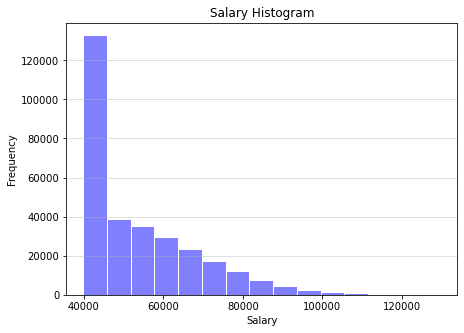

In [9]:
x = salary_df['salary']

plt.figure(figsize=(7,5))
n, bins, patches = plt.hist(x, bins=15, color='blue', alpha=0.5, rwidth=0.95)

plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.5)
plt.show()

### 4. Import salary summary from PostgreSQL database into Pandas

In [6]:
## Build SQL statement
sql_statement = 'SELECT t.title_name, COUNT(e.emp_no) AS "emp_count", AVG(s.salary) AS "salary_avg" \
                FROM employee AS e \
                LEFT JOIN title AS t ON e.title_id = t.title_id \
                LEFT JOIN salary AS s ON e.emp_no = s.emp_no \
                GROUP BY t.title_name \
                ORDER BY "emp_count" DESC;'

In [7]:
## Retrieve salary summary from SQL group by result into DataFrame
summary_df = pd.read_sql(sql_statement, connection)
## Set index
summary_df.set_index('title_name', drop=True, inplace=True)
## Show DataFrame
summary_df

,emp_count,salary_avg
title_name,,
Staff,107384,58465.382850
Senior Engineer,97747,48506.799871
Engineer,47303,48535.336511
Senior Staff,26583,58550.172704
Technique Leader,15148,48582.896092
Assistant Engineer,5835,48564.434447
Manager,24,51531.041667


### 5. Visualize average salary per job title (bar chart)

In [16]:
# summary_df['emp_count'].plot(kind='barh', color='red', alpha=0.5)

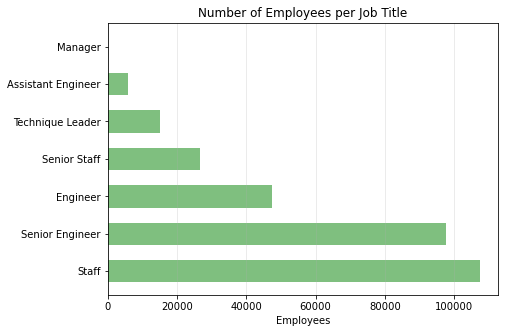

In [11]:
x = summary_df['emp_count']
y = summary_df.index

plt.figure(figsize=(7,5))
plt.barh(y, width=x, height=0.6, color='green', alpha=0.5)

plt.title('Number of Employees per Job Title')
plt.ylabel('')
plt.xlabel('Employees')

plt.xticks(rotation=0)

plt.grid(axis='x', alpha=0.3)
plt.show()

In [15]:
# summary_df['salary_avg'].plot(kind='barh', color='red', alpha=0.5)

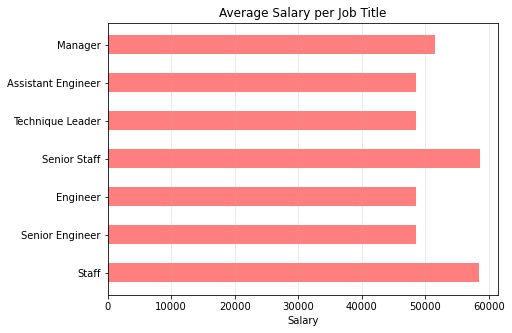

In [14]:
x = summary_df['salary_avg']
y = summary_df.index

plt.figure(figsize=(7,5))
plt.barh(y, width=x, height=0.5, color='red', alpha=0.5)

plt.title('Average Salary per Job Title')
plt.ylabel('')
plt.xlabel('Salary')

plt.xticks(rotation=0)

plt.grid(axis='x', alpha=0.3)
plt.show()